# House Price Prediction using Feature Selection
 #### Author: Halit Vural

This work was inspired by support from Clarusway

http://www.clarusway.com 

and the ideas of

the Author of

https://www.kaggle.com/erikbruin/house-prices-lasso-xgboost-and-a-detailed-eda

<a id='toc'></a>
## Table of Contents

* [Introduction](#intro)
* [Import libraries](#import)
* [Load Data](#load)
* [Explore the most important variables](#explore)



<a id="intro"></a>
# Introduction 
| [toc](#toc)<br>
The work shown here is inspired by Clarusway educators and students. I used the flow of the notebook by Erik Bruin explaining EDA for House Price prediction. This work is to present Clarusway students for a recap of given Machine Learning course. All the code is taken from Clarusway teaching staff and the Internet search. The code without a reference gives a credit to Clarusway tutors. I tried to include the references from Internet searches.


<a id='import'></a>
### Import required libraries
| [toc](#toc)<br>
We will import the libraries needed for our method calls.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')


In [2]:
# !pip install matplotlib

In [3]:
# !pip install seaborn

<a id='load'></a>
# Load Data
| [toc](#toc)<br>

In [4]:
#ingest from local
df = pd.read_csv('train.csv')

In [5]:
#from google.colab import drive
#drive.mount('/content/gdrive/')

In [6]:
#ingest from Google Drive
#df = pd.read_csv('/content/gdrive/MyDrive/ML-DS/Git-Repo/ML-devcode/Kaggle/Competitions/House Price Prediction/train.csv')

In [7]:
#ingest from Kaggle
# df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [8]:
df.shape

(1460, 81)

# Identify the Structure of the Data
| [toc](#toc)<br>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We identify that SalePrice is our target variable.

In [10]:
target = 'SalePrice'

In [11]:
df.drop(columns='Id', inplace=True)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


<a id='explore'></a>
## Exploring the most important variables
| [toc](#toc)<br>

In [13]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

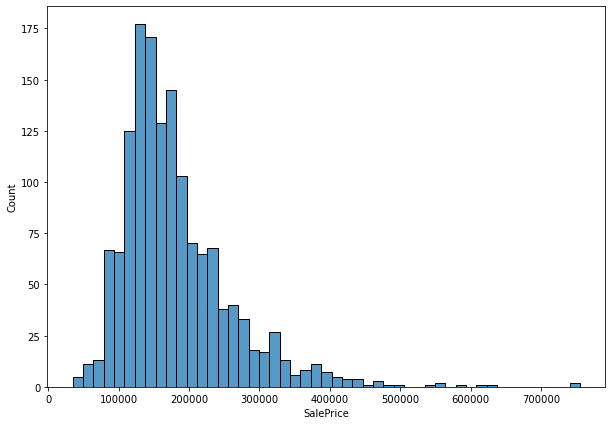

In [14]:
plt.rcParams["figure.figsize"] = (10,7)
sns.histplot(data=df, x=target)

<AxesSubplot:>

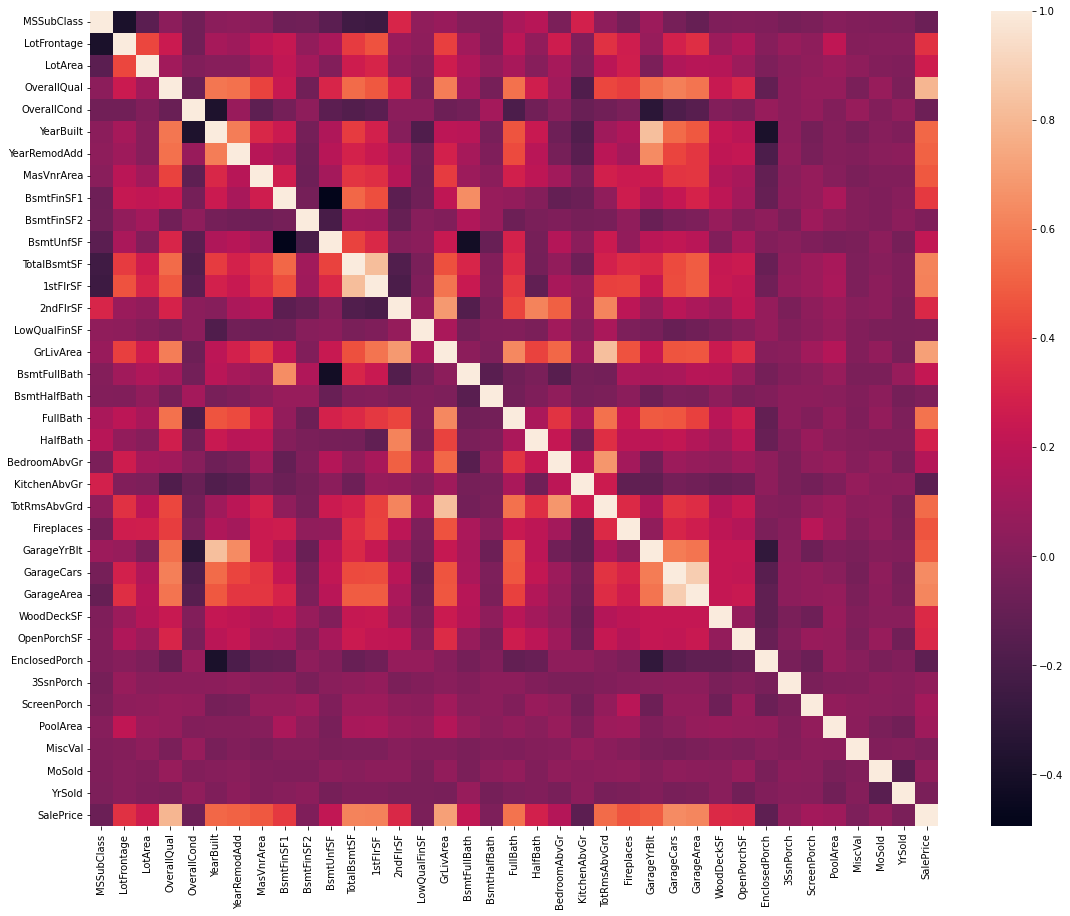

In [15]:
plt.rcParams["figure.figsize"] = (19,15)
sns.heatmap(df.corr())

<AxesSubplot:>

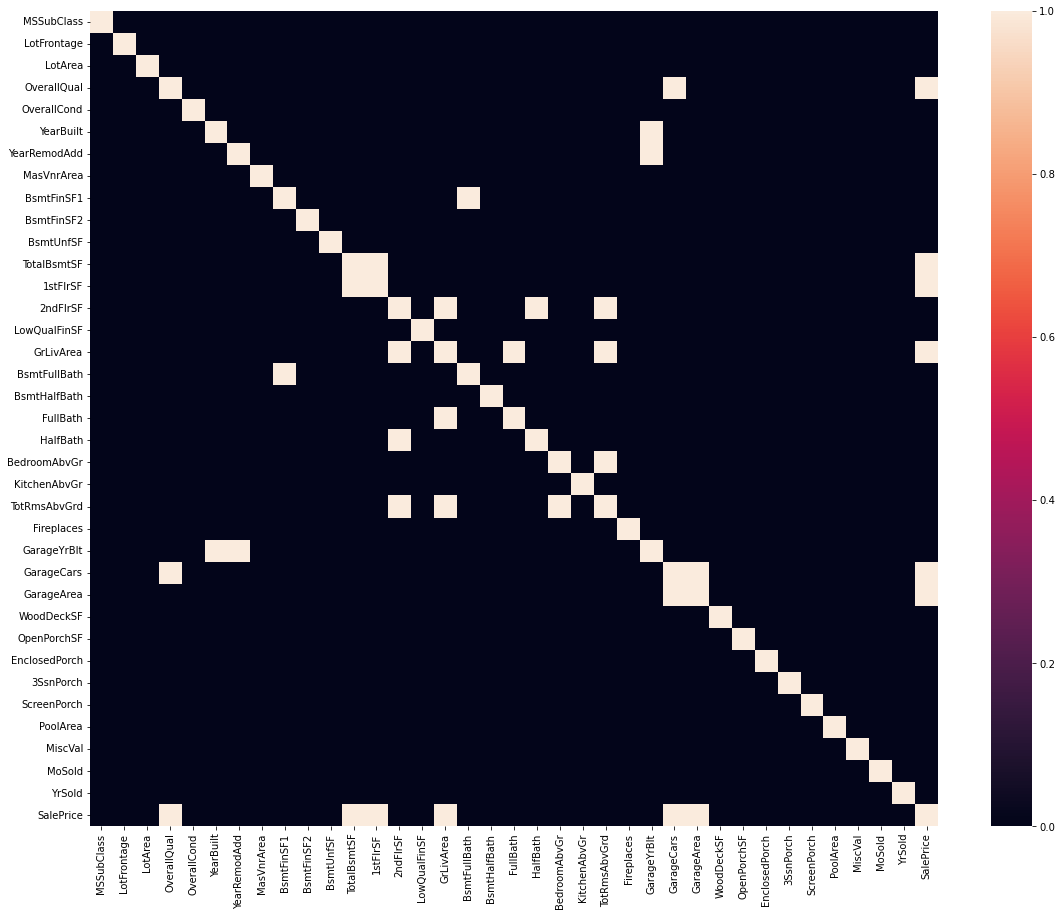

In [16]:
plt.rcParams["figure.figsize"] = (19,15)
sns.heatmap(df.corr()>0.6) #>.7)

In [17]:
def print_corr_list(data, col_Target, prec=0.5):
    print(f'Corr between {col_Target} and :')
    cnt = 0
    for i in data.select_dtypes(['number']).drop(columns = col_Target) :
        c=data[col_Target].corr(data[i])
        if c > prec:
            print(f'{i:<12} : {c:.5}')
            cnt += 1
    print(f"({cnt}) variables listed.")
    print(f"Correlation threshold: {prec}")

In [18]:
print_corr_list(df, target)

Corr between SalePrice and :
OverallQual  : 0.79098
YearBuilt    : 0.5229
YearRemodAdd : 0.5071
TotalBsmtSF  : 0.61358
1stFlrSF     : 0.60585
GrLivArea    : 0.70862
FullBath     : 0.56066
TotRmsAbvGrd : 0.53372
GarageCars   : 0.64041
GarageArea   : 0.62343
(10) variables listed.
Correlation threshold: 0.5


In [19]:
print_corr_list(df, target, 0.62)

Corr between SalePrice and :
OverallQual  : 0.79098
GrLivArea    : 0.70862
GarageCars   : 0.64041
GarageArea   : 0.62343
(4) variables listed.
Correlation threshold: 0.62


In [20]:
df['GarageArea'].corr(df['GarageCars'])

0.8824754142814629

GarageArea and GarageCars are highly correlated (0.89) with each other.

In [21]:
df.select_dtypes(include=np.number).count().count()

37

In [22]:
def corr_columns(data, col_Target, precision=0.5):
   print(f'Correlated Columns with {col_Target}:')
   list = [col_Target]
   for i in data.select_dtypes(['number']).drop(columns = col_Target):
        c=data[col_Target].corr(data[i])
        if c > precision:
           list.append(i) 
   return list

In [23]:
list = corr_columns(df, target, 0.6)
list

Correlated Columns with SalePrice:


['SalePrice',
 'OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea']

### Pair plot

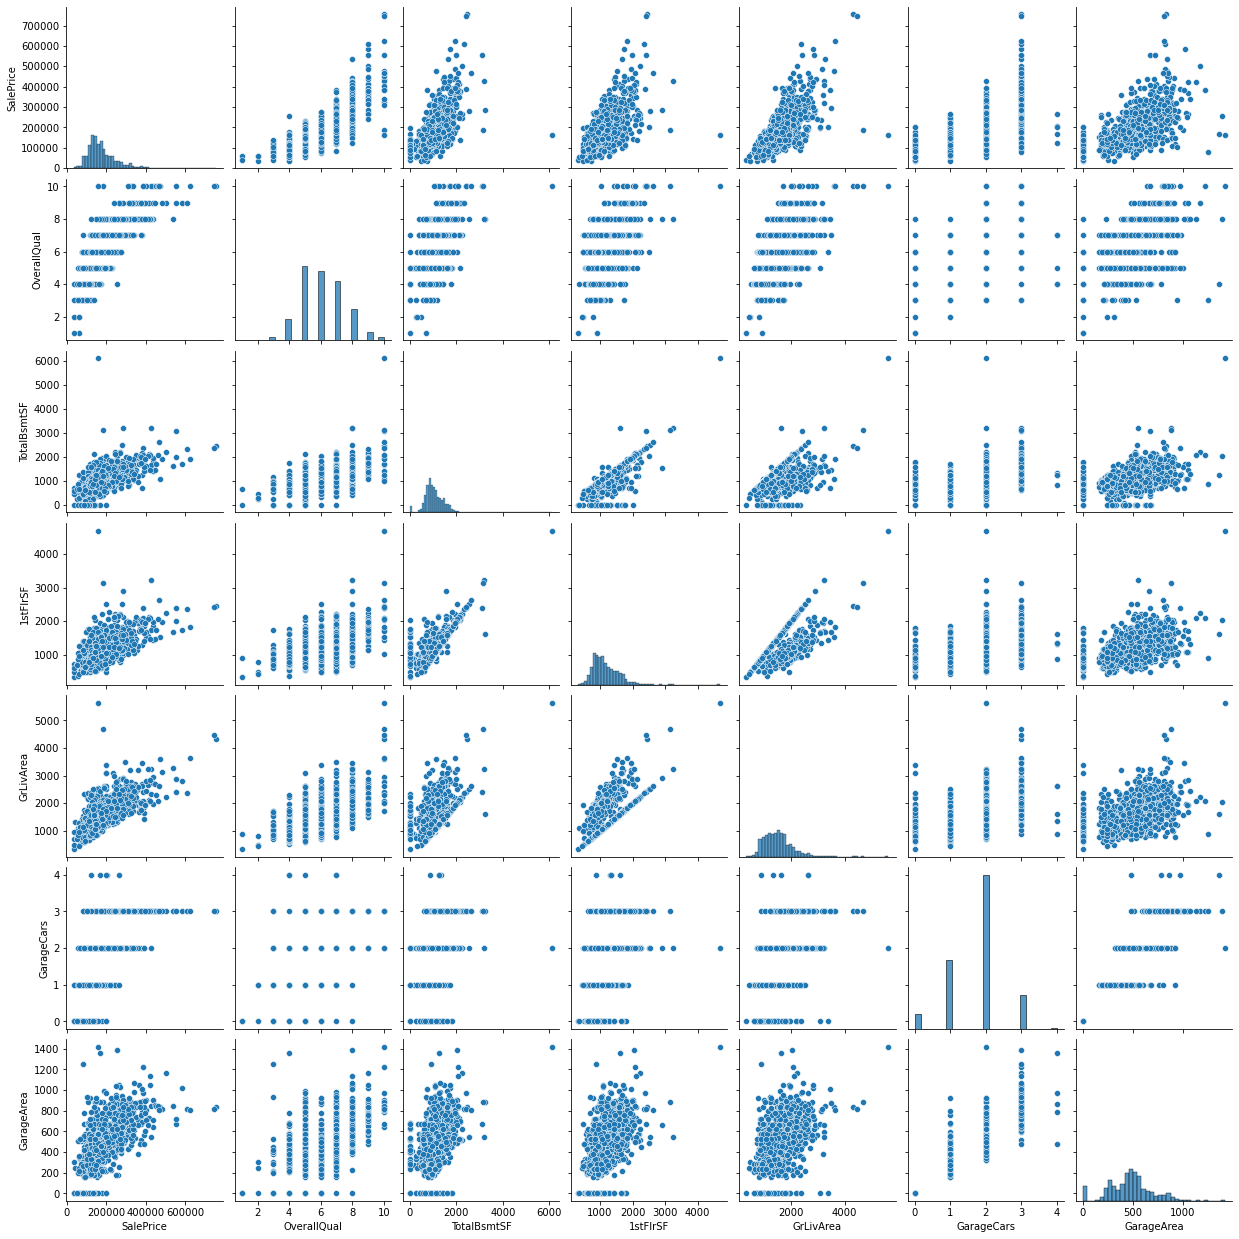

In [24]:
plt.rcParams["figure.figsize"] = (19,15)
sns.pairplot(df[list])

# Data Cleaning

## Missing Values

A guide to deal with missing values

https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/

In [25]:
df.isnull().sum().any()

True

In [26]:
df.isnull().sum().sum()

6965

In [27]:
df.shape

(1460, 80)

In [28]:
def count_na(data):
  list ={}
  for i in df.columns:
    cnt = df[i].isnull().sum()
    if cnt > 0:
      list[i] = cnt
  return list

In [29]:
count_na(df)

{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

In [30]:
len(count_na(df))

19

In [31]:
df.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [32]:
#drop the column because it has to many NA
#df.drop("Alley",axis=1,inplace=True)

In [33]:
df.Alley[df.Alley.isna()] = 'None'

In [34]:
count_na(df)

{'LotFrontage': 259,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

In [35]:
df.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [36]:
df.MiscFeature[df.MiscFeature.isna()] = 'None'


In [37]:
df.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [38]:
df.FireplaceQu[df.FireplaceQu.isna()] = 'None'

In [39]:
df.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [40]:
df.PoolQC[df.PoolQC.isna()] = 'None'

In [41]:
count_na(df)

{'LotFrontage': 259,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'Fence': 1179}

In [42]:
df.Fence[df.Fence.isna()] = 'None'

In [43]:
df.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

The missing values in LotFrontage can be filled with median. The following article explains why:

https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

In [44]:
df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.median())

In [45]:
count_na(df)

{'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81}

In [46]:
df.GarageType[df.GarageType.isna()] = 'None'
df.GarageFinish[df.GarageFinish.isna()] = 'None'
df.GarageQual[df.GarageQual.isna()] = 'None'
df.GarageCond[df.GarageCond.isna()] = 'None'

In [47]:
df.GarageYrBlt[df.GarageYrBlt.isna()] = df.YearBuilt[df.GarageYrBlt.isna()]

In [48]:
count_na(df)

{'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1}

In [49]:
df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [50]:
df_ = df[df.MasVnrArea.isna() | df.MasVnrType.isna()]
(df_.MasVnrType, df_.MasVnrArea)

(234     NaN
 529     NaN
 650     NaN
 936     NaN
 973     NaN
 977     NaN
 1243    NaN
 1278    NaN
 Name: MasVnrType, dtype: object,
 234    NaN
 529    NaN
 650    NaN
 936    NaN
 973    NaN
 977    NaN
 1243   NaN
 1278   NaN
 Name: MasVnrArea, dtype: float64)

In [51]:
df.MasVnrArea.median()

0.0

In [52]:
df.MasVnrArea[df.MasVnrType.isna()] = 0.0

In [53]:
df.MasVnrType[df.MasVnrType.isna()] = 'None'

In [54]:
count_na(df)

{'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1}

In [55]:
df.BsmtCond[df.BsmtCond.isna()] = "None"
df.BsmtQual[df.BsmtQual.isna()] = "None"
df.BsmtExposure[df.BsmtExposure.isna()] = "None"
df.BsmtFinType1[df.BsmtFinType1.isna()] = "None"
df.BsmtFinType2[df.BsmtFinType2.isna()] = "None"

In [56]:
count_na(df)

{'Electrical': 1}

In [57]:
df.Electrical[df.Electrical.isna()] = 'SBrkr'

In [58]:
count_na(df)

{}

We have cleared all missing values by imputation.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<AxesSubplot:>

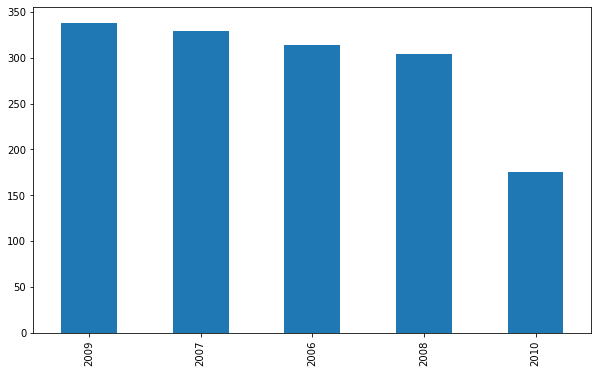

In [60]:
plt.rcParams["figure.figsize"] = (10,6)
df.YrSold.value_counts().plot.bar()

<AxesSubplot:>

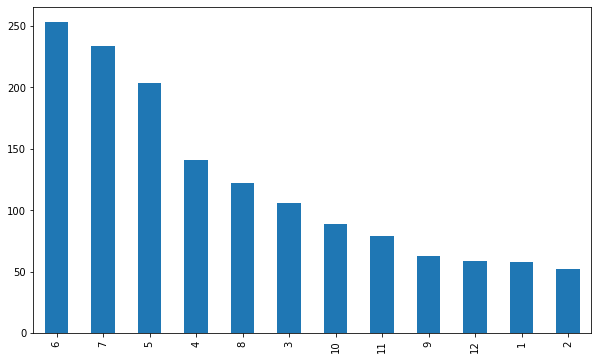

In [61]:
df.MoSold.value_counts().plot.bar()

#### Calculate Median of Prices according to Year/Month

ref: https://www.datasciencemadesimple.com/group-by-mean-in-pandas-dataframe-python-2/ 

<AxesSubplot:xlabel='YrSold'>

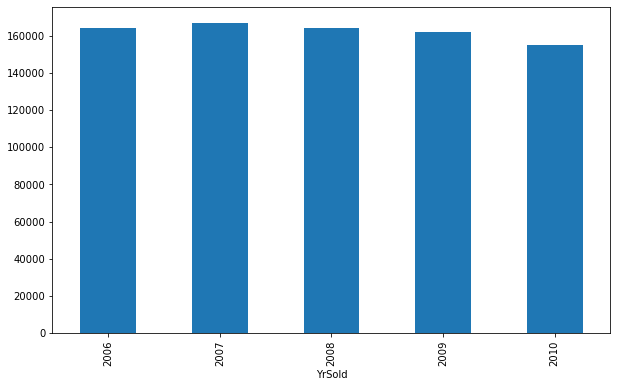

In [62]:
df.groupby(['YrSold'])['SalePrice'].median().plot.bar()

<AxesSubplot:xlabel='MoSold'>

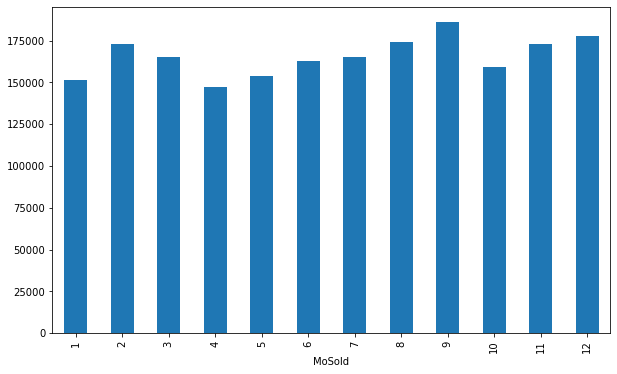

In [63]:
df.groupby(['MoSold'])['SalePrice'].median().plot.bar()

Understanding Bar plots 

https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/

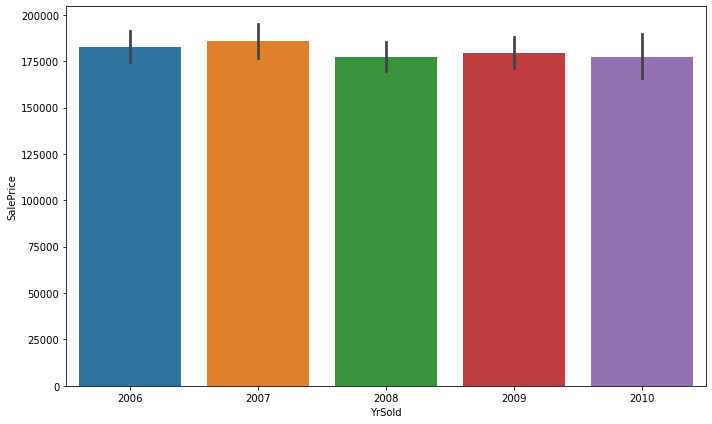

In [64]:
plt.rcParams["figure.figsize"] = (10,6)
sns.barplot(x = df['YrSold'], y = df['SalePrice'], data = df.groupby(['MoSold'])['SalePrice'].median())
#plt.xticks(rotation = 90)
plt.tight_layout()

## Refactoring the features

We will convert year and month data into string.

ref1: https://datatofish.com/integers-to-strings-dataframe/

ref2: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

In [65]:
df['YrSold'] = df['YrSold'].apply(str)
df['MoSold'] = df['MoSold'].apply(str)

Similarly, some other numeric variables should be converted to string. They are:
* OverallCond 1-10
* OverallQual 1-10
* YearBuilt
* YearRemodAdd
* GarageYrBlt



In [66]:
df.OverallCond = df.OverallCond.apply(str)
df.OverallQual = df.OverallQual.apply(str)
df.YearBuilt = df.YearBuilt.apply(str)
df.YearRemodAdd = df.YearRemodAdd.apply(str)
df.GarageYrBlt = df.GarageYrBlt.apply(str)

MSSubClass includes the numbers, but they are labels. We need to change them into labels.

In [67]:
df.MSSubClass = df.MSSubClass.replace({
                20 : '1STORY_1946+',
                30 : '1STORY_1945-',
                40 : '1STORY_FIN_ATTIC',
                45 : '1+STORY_UNF',
                50 : '1+STORY_FIN',
                60 : '2STORY_1946+',
                70 : '2STORY_1945-',
                75 : '2+STORY',
                80 : 'SPL_OR_MULTI',
                85 : 'SPL_FOYER',
                90 : 'DUPL_ALL',
                120 : '1STORY_PUD_1946+',
                150 : '1+STORY_PUD',
                160 : '2STORY_PUD_1946+',
                180 : 'PUD_MULTI',
                190 : '2FAMILY_CONV'
            })
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2STORY_1946+,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,1STORY_1946+,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,2STORY_1946+,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,2STORY_1945-,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,2STORY_1946+,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [68]:
df.MSSubClass.unique()

array(['2STORY_1946+', '1STORY_1946+', '2STORY_1945-', '1+STORY_FIN',
       '2FAMILY_CONV', '1+STORY_UNF', 'DUPL_ALL', '1STORY_PUD_1946+',
       '1STORY_1945-', 'SPL_FOYER', 'SPL_OR_MULTI', '2STORY_PUD_1946+',
       '2+STORY', 'PUD_MULTI', '1STORY_FIN_ATTIC'], dtype=object)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [70]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include=numerics).count().count()

29

In [71]:
df.select_dtypes(include='object').count().count()

51

## Defining Important Variables

After cleaning the data, we will check correlation again.

### Correlations

In [72]:
print_corr_list(df, target)

Corr between SalePrice and :
TotalBsmtSF  : 0.61358
1stFlrSF     : 0.60585
GrLivArea    : 0.70862
FullBath     : 0.56066
TotRmsAbvGrd : 0.53372
GarageCars   : 0.64041
GarageArea   : 0.62343
(7) variables listed.
Correlation threshold: 0.5


Since this list includes only numeric variables, categorical variables are not shown as correlated. But we know that some categorical variables can correlate with the price of a house.

### Feature Engineering

We can sum up some variables into one to increase the correlation with the price such as total living area of the house.

#### Total number of bathrooms

In [73]:
df['TotBathrooms'] = df.FullBath + (df.HalfBath * 0.5) + df.BsmtFullBath + (df.BsmtHalfBath * 0.5)

#### House age, Remodeled, isNew

In [74]:
df["Age"] = df.YrSold.astype(int) - df.YearRemodAdd.astype(int)

In [75]:
df.Age.corr(df.SalePrice)

-0.5090787380156294

In [76]:
#sign = "positive" if num >=0 else "negative"
#df['Remodeled'] = "Yes" if df.YearBuilt<df.YearRemodAdd else "No"

#### Total Square Feet

In [77]:
df['TotalArea'] = df.GrLivArea + df.TotalBsmtSF

In [78]:
df.TotalArea.corr(df.SalePrice)

0.7789588289942262

## Drop correlated variables

<AxesSubplot:>

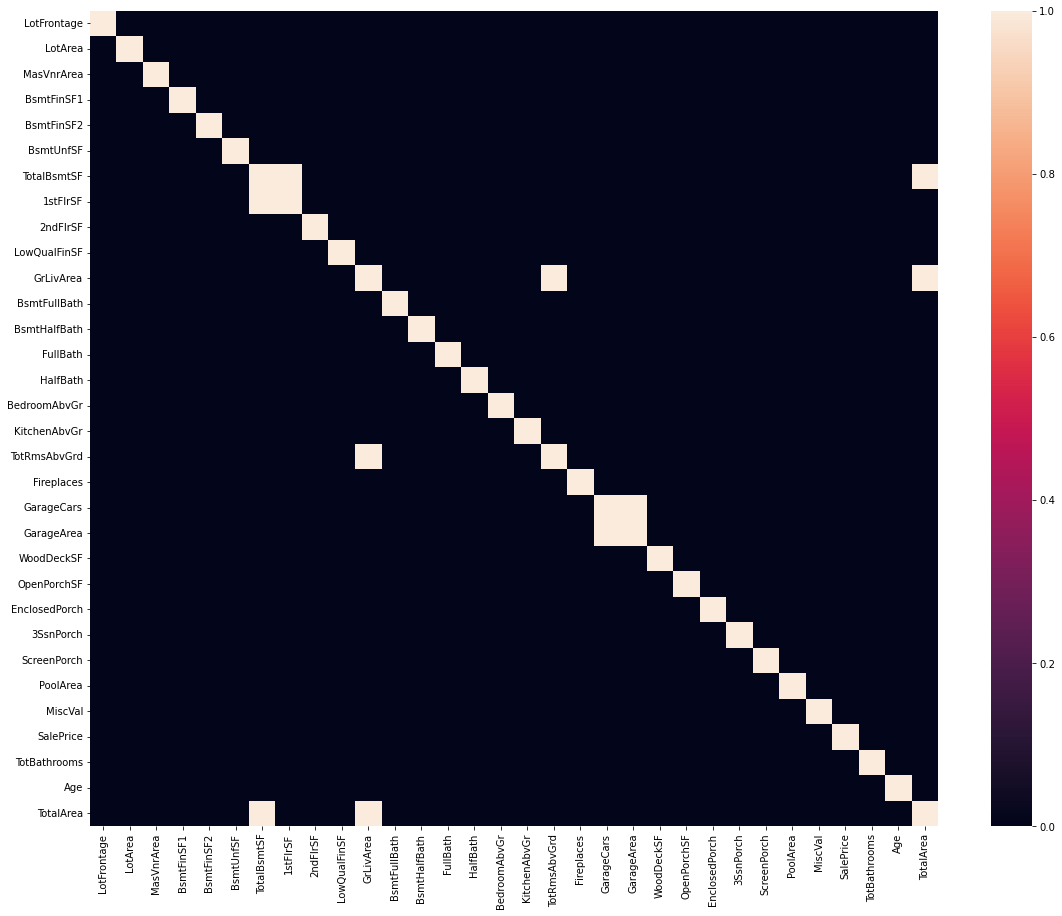

In [79]:
plt.rcParams["figure.figsize"] = (19,15)
sns.heatmap(df.corr()>0.8)

We will drop GarageArea (0.62) because it is less correlated with the price.

In [80]:
df_ = df.copy()     # we will use this for tree algorithms
df.drop(columns=['GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd'] , inplace=True)

In [81]:
df.GrLivArea.corr(df.TotalArea)

0.8803239594943527

In [ ]:
print_corr_list(df, target, 0.7)

Corr between SalePrice and :
GrLivArea    : 0.70862
TotalArea    : 0.77896
(2) variables listed.
Correlation threshold: 0.7


## Outliers

### Visualize data for outliers

In [ ]:
#plot a boxplot and a histogram along the same scale
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

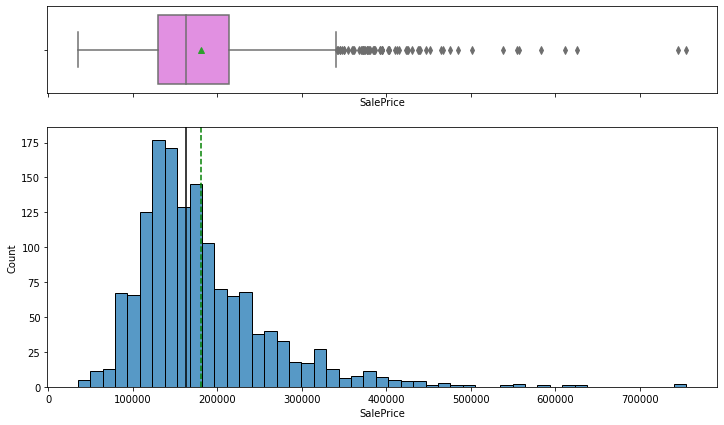

In [709]:
histogram_boxplot(df, target)

In [710]:
list = corr_columns(df, target, 0.6)
list

Correlated Columns with SalePrice:


['SalePrice',
 '1stFlrSF',
 'GrLivArea',
 'GarageCars',
 'TotBathrooms',
 'TotalArea']

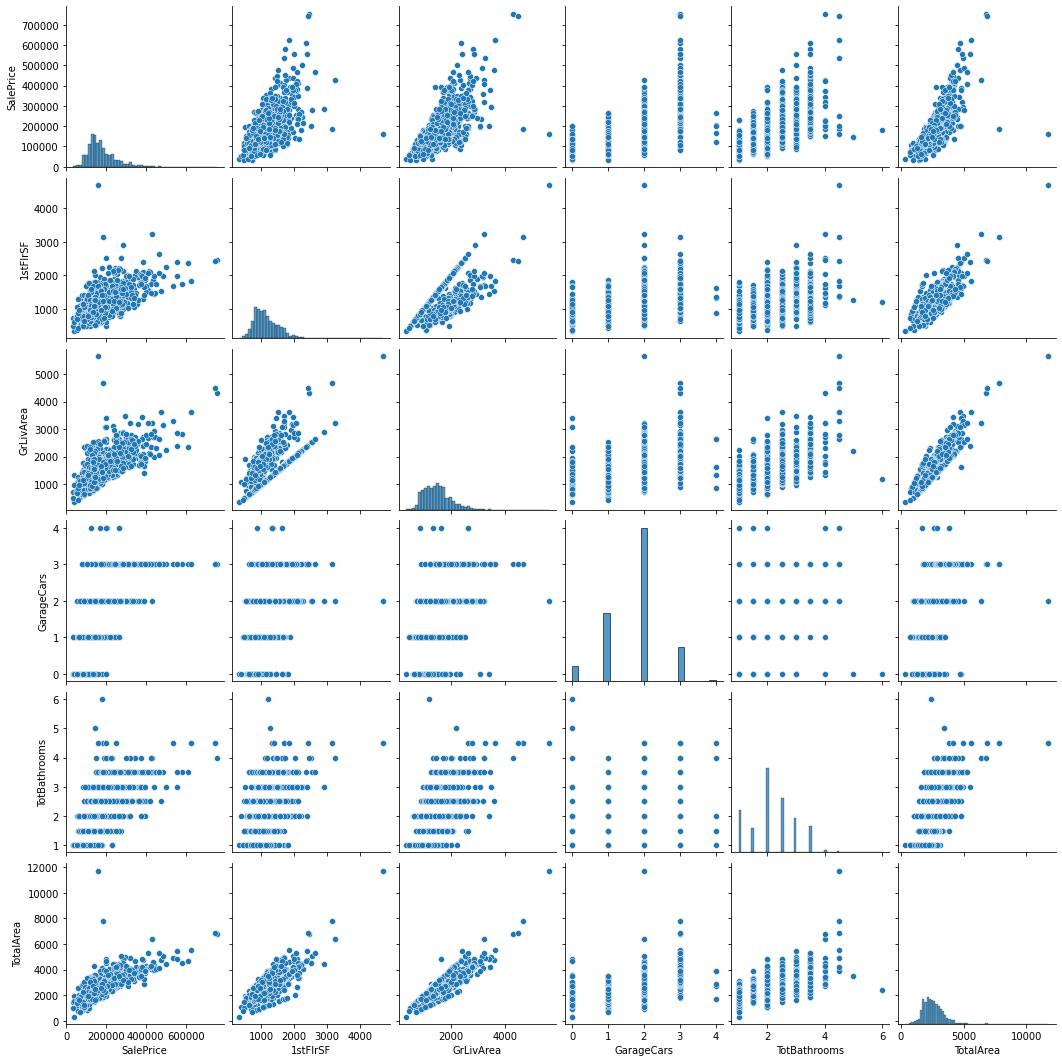

In [711]:
plt.rcParams["figure.figsize"] = (19,15)
sns.pairplot(df[list])

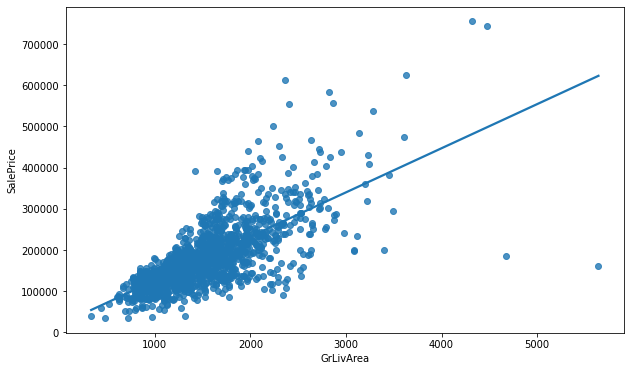

In [712]:
plt.rcParams["figure.figsize"] = (10,6)
sns.regplot(x = df.GrLivArea, y = target, data = df, ci = None);

In [82]:
df = df[df.SalePrice < 700000]
df_ = df_[df_.SalePrice < 700000]

In [83]:
df = df[df.TotalArea< 7500]
df_ = df_[df_.TotalArea< 7500]

<AxesSubplot:xlabel='TotBathrooms', ylabel='SalePrice'>

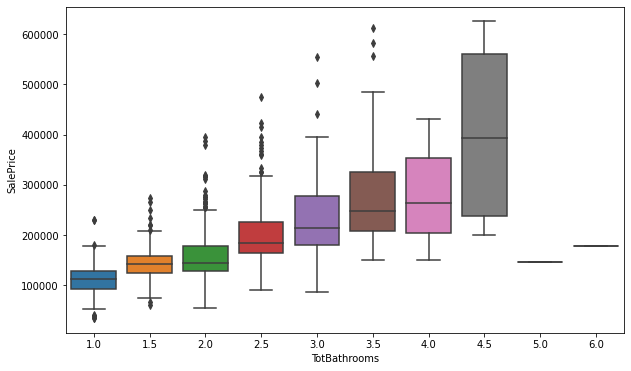

In [715]:
sns.boxplot(x='TotBathrooms', y=target, data=df)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

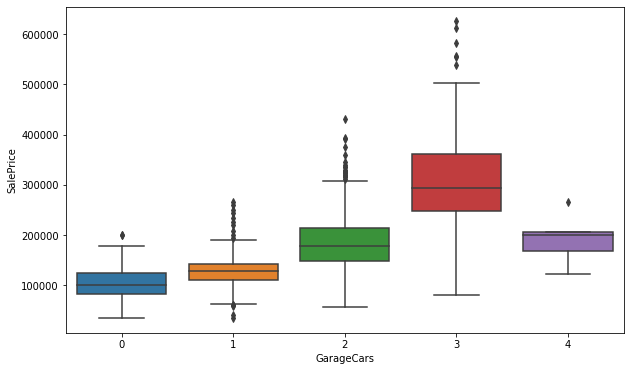

In [716]:
sns.boxplot(x='GarageCars', y=target, data=df) 

# Preprocessing Data

Modeling with numeric variables vs. Modeling with dummies?

In [84]:
from sklearn.model_selection import train_test_split

In [718]:
df1_numeric = df.select_dtypes(include=numerics)
X1 = df1_numeric.drop(target,axis=1)
y1 = df1_numeric[target]

In [719]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=101)

In [720]:
df2_dummies = pd.get_dummies(df,drop_first=True)
X2 = df2_dummies.drop(target,axis=1)
y2 = df2_dummies[target]

In [721]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=101)

# Modeling

## Linear Regression

In [722]:
from sklearn.linear_model import LinearRegression

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def validate(y_train, y_train_pred, y_test, y_pred, label):
    scores = {
            label+" train": {
                "R2" : f"{r2_score(y_train, y_train_pred):.3f}",
                "mae" : f"{mean_absolute_error(y_train, y_train_pred):.3f}",
                "mse" : f"{mean_squared_error(y_train, y_train_pred):.3f}",                          
                "rmse" : f"{np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}"
                },
            label+" test": {
                "R2" : f"{r2_score(y_test, y_pred):.3f}",
                "mae" : f"{mean_absolute_error(y_test, y_pred):.3f}",
                "mse" : f"{mean_squared_error(y_test, y_pred):.3f}",
                "rmse" : f"{np.sqrt(mean_squared_error(y_test, y_pred)):.3f}"
                }
            }    
    return pd.DataFrame(scores)

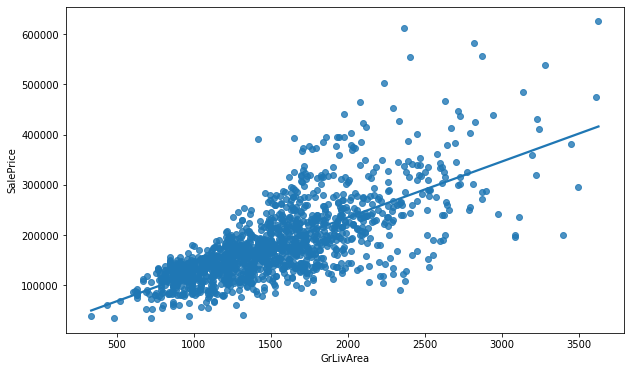

In [724]:
plt.rcParams["figure.figsize"] = (10,6)
sns.regplot(x = df.GrLivArea, y = target, data = df, ci = None);

In [725]:
lin1_model = LinearRegression()
lin1_model.fit(X1_train, y1_train)

LinearRegression()

In [726]:
lin2_model = LinearRegression()
lin2_model.fit(X2_train, y2_train)

LinearRegression()

In [727]:
y1test_pred = lin1_model.predict(X1_test)
y1train_pred = lin1_model.predict(X1_train)

In [728]:
y2test_pred = lin2_model.predict(X2_test)
y2train_pred = lin2_model.predict(X2_train)

### Evaluate Results

In [729]:
t1 = validate(y1_train, y1train_pred, y1_test, y1test_pred, "linear(numeric)")
t1

,linear(numeric) train,linear(numeric) test
R2,0.831,0.812
mae,22111.380,23995.758
mse,986300242.026,1137323624.908
rmse,31405.417,33724.229


In [730]:
t2 = validate(y2_train, y2train_pred, y2_test, y2test_pred, "linear(dummies)")
t2

,linear(dummies) train,linear(dummies) test
R2,0.961,0.820
mae,9942.886,21762.411
mse,226739140.936,1093408511.782
rmse,15057.860,33066.728


In [731]:
tAll = t1

## Linear Regression with Normalization

See: https://www.baeldung.com/cs/normalization-vs-standardization

In [732]:
from sklearn.preprocessing import MinMaxScaler

In [733]:
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

In [734]:
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

In [735]:
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

In [736]:
lin1scaled_model = LinearRegression()
lin1scaled_model.fit(X1_train_scaled, y1_train)

LinearRegression()

In [737]:
y1testscaled_pred = lin1scaled_model.predict(X1_test_scaled)
y1trainscaled_pred = lin1scaled_model.predict(X1_train_scaled)

In [738]:
lin2scaled_model = LinearRegression()
lin2scaled_model.fit(X2_train_scaled, y2_train)

LinearRegression()

In [739]:
y2testscaled_pred = lin2scaled_model.predict(X2_test_scaled)
y2trainscaled_pred = lin2scaled_model.predict(X2_train_scaled)

### Evaluate Results

In [740]:
t1scaled = validate(y1_train, y1trainscaled_pred, y1_test, y1testscaled_pred, "linear(numeric-scaled)")
t1scaled

,linear(numeric-scaled) train,linear(numeric-scaled) test
R2,0.831,0.812
mae,22111.364,23995.798
mse,986300301.053,1137324533.879
rmse,31405.418,33724.243


In [741]:
t2scaled = validate(y2_train, y2trainscaled_pred, y2_test, y2testscaled_pred, "linear(dummies-scaled)")
t2scaled

,linear(dummies-scaled) train,linear(dummies-scaled) test
R2,0.961,-5486189865583232000.000
mae,9943.802,32272296158849.930
mse,226742412.747,33242954065373429912001576960.000
rmse,15057.968,182326504012371.812


## Cross-Validation

In [85]:
from sklearn.model_selection import cross_validate, cross_val_score

In [743]:
from sklearn.metrics import SCORERS
print(SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [744]:
model = LinearRegression()
scores = cross_validate(model, X1_train_scaled, y1_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [745]:
pd.DataFrame(scores).mean()

fit_time                            7.831812e-03
score_time                          4.695272e-03
test_r2                             8.132567e-01
test_neg_mean_absolute_error       -2.281774e+04
test_neg_mean_squared_error        -1.057241e+09
test_neg_root_mean_squared_error   -3.221570e+04
dtype: float64

### Evaluate Results

In [746]:
t1CV = pd.DataFrame(scores).iloc[:, 2:].mean()
t1CV

test_r2                             8.132567e-01
test_neg_mean_absolute_error       -2.281774e+04
test_neg_mean_squared_error        -1.057241e+09
test_neg_root_mean_squared_error   -3.221570e+04
dtype: float64

In [747]:
t1scaled

,linear(numeric-scaled) train,linear(numeric-scaled) test
R2,0.831,0.812
mae,22111.364,23995.798
mse,986300301.053,1137324533.879
rmse,31405.418,33724.243


In [748]:
pd.concat([tAll, t1scaled], axis=1)

,linear(numeric) train,linear(numeric) test,linear(numeric-scaled) train,linear(numeric-scaled) test
R2,0.831,0.812,0.831,0.812
mae,22111.380,23995.758,22111.364,23995.798
mse,986300242.026,1137323624.908,986300301.053,1137324533.879
rmse,31405.417,33724.229,31405.418,33724.243


## Lasso Regression

In [749]:
from sklearn.linear_model import Lasso, LassoCV

In [383]:
lasso_model = Lasso(alpha=10, random_state=101)
lasso_model.fit(X1_train_scaled, y1_train)

Lasso(alpha=1, random_state=101)

In [384]:
y3_pred = lasso_model.predict(X1_test_scaled)
y3_train_pred = lasso_model.predict(X1_train_scaled)

### Evaluation

In [385]:
t3lasso = validate(y1_train, y3_train_pred, y1_test, y3_pred, "lasso")
t3lasso

,lasso train,lasso test
R2,0.831,0.812
mae,22110.103,23995.501
mse,986303215.581,1137185347.319
rmse,31405.465,33722.179


In [461]:
pd.concat([tAll, t3lasso], axis=1)

,linear(numeric) train,linear(numeric) test,lasso train,lasso test
R2,0.831,0.812,0.831,0.812
mae,22111.380,23995.758,22110.103,23995.501
mse,986300242.026,1137323624.908,986303215.581,1137185347.319
rmse,31405.417,33724.229,31405.465,33722.179


## Cross-Validation for Lasso

In [386]:
model = Lasso(alpha=1, random_state=101)
scores = cross_validate(model, X1_train_scaled, y1_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [387]:
t3lassoCV = pd.DataFrame(scores).iloc[:, 2:].mean()
t3lassoCV

test_r2                             8.137723e-01
test_neg_mean_absolute_error       -2.278499e+04
test_neg_mean_squared_error        -1.053869e+09
test_neg_root_mean_squared_error   -3.216743e+04
dtype: float64

In [388]:
t1scaled

,linear(numeric-scaled) train,linear(numeric-scaled) test
R2,0.831,0.812
mae,22111.364,23995.798
mse,986300301.053,1137324533.879
rmse,31405.418,33724.243


### Grid Search for Alpha

In [389]:
alpha_space = np.linspace(9.9, 10, 100)
alpha_space

array([ 9.9       ,  9.9010101 ,  9.9020202 ,  9.9030303 ,  9.9040404 ,
        9.90505051,  9.90606061,  9.90707071,  9.90808081,  9.90909091,
        9.91010101,  9.91111111,  9.91212121,  9.91313131,  9.91414141,
        9.91515152,  9.91616162,  9.91717172,  9.91818182,  9.91919192,
        9.92020202,  9.92121212,  9.92222222,  9.92323232,  9.92424242,
        9.92525253,  9.92626263,  9.92727273,  9.92828283,  9.92929293,
        9.93030303,  9.93131313,  9.93232323,  9.93333333,  9.93434343,
        9.93535354,  9.93636364,  9.93737374,  9.93838384,  9.93939394,
        9.94040404,  9.94141414,  9.94242424,  9.94343434,  9.94444444,
        9.94545455,  9.94646465,  9.94747475,  9.94848485,  9.94949495,
        9.95050505,  9.95151515,  9.95252525,  9.95353535,  9.95454545,
        9.95555556,  9.95656566,  9.95757576,  9.95858586,  9.95959596,
        9.96060606,  9.96161616,  9.96262626,  9.96363636,  9.96464646,
        9.96565657,  9.96666667,  9.96767677,  9.96868687,  9.96

In [390]:
model = LassoCV(alphas = alpha_space, cv = 10, max_iter=100000, random_state=101)

In [391]:
model.fit(X1_train_scaled, y1_train)

LassoCV(alphas=array([ 9.9       ,  9.9010101 ,  9.9020202 ,  9.9030303 ,  9.9040404 ,
        9.90505051,  9.90606061,  9.90707071,  9.90808081,  9.90909091,
        9.91010101,  9.91111111,  9.91212121,  9.91313131,  9.91414141,
        9.91515152,  9.91616162,  9.91717172,  9.91818182,  9.91919192,
        9.92020202,  9.92121212,  9.92222222,  9.92323232,  9.92424242,
        9.92525253,  9.92626263,  9.92727273,  9.92828283,  9.92929293,
        9.9303030...
        9.97070707,  9.97171717,  9.97272727,  9.97373737,  9.97474747,
        9.97575758,  9.97676768,  9.97777778,  9.97878788,  9.97979798,
        9.98080808,  9.98181818,  9.98282828,  9.98383838,  9.98484848,
        9.98585859,  9.98686869,  9.98787879,  9.98888889,  9.98989899,
        9.99090909,  9.99191919,  9.99292929,  9.99393939,  9.99494949,
        9.9959596 ,  9.9969697 ,  9.9979798 ,  9.9989899 , 10.        ]),
        cv=10, max_iter=100000, random_state=101)

In [392]:
best_alpha = model.alpha_
best_alpha

9.994949494949495

In [393]:
y4_pred = model.predict(X1_test_scaled)   #Lasso(alpha =9.994)
y4_train_pred = model.predict(X1_train_scaled)

In [394]:
t3gridCV = validate(y1_train, y4_train_pred, y1_test, y4_pred, "lasso_gridCV")
t3gridCV

,lasso_gridCV train,lasso_gridCV test
R2,0.831,0.812
mae,22088.967,23984.560
mse,986492565.682,1136450652.004
rmse,31408.479,33711.284


In [462]:
tAll = pd.concat([t1,t1scaled, t3lasso, t3gridCV], axis = 1)
tAll

,linear(numeric) train,linear(numeric) test,linear(numeric-scaled) train,linear(numeric-scaled) test,lasso train,lasso test,lasso_gridCV train,lasso_gridCV test
R2,0.831,0.812,0.831,0.812,0.831,0.812,0.831,0.812
mae,22111.380,23995.758,22111.364,23995.798,22110.103,23995.501,22088.967,23984.560
mse,986300242.026,1137323624.908,986300301.053,1137324533.879,986303215.581,1137185347.319,986492565.682,1136450652.004
rmse,31405.417,33724.229,31405.418,33724.243,31405.465,33722.179,31408.479,33711.284


## One more try with Linear

In [754]:
d3_GrLivArea = df[['GrLivArea']]
X3 = df[['GrLivArea']]
y3 = df[target]


In [755]:
X3.head()

,GrLivArea
0,1710
1,1262
2,1786
3,1717
4,2198


In [756]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101)

In [757]:
lin3_model = LinearRegression()
lin3_model.fit(X3_train, y3_train)

# ValueError: Expected 2D array, got 1D array instead:
# array=[1383 1709 1128 ... 1904 1674 1002].
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

LinearRegression()

In [758]:
y5_pred = lin3_model.predict(X3_test)   #Lasso(alpha =9.994)
y5_train_pred = lin3_model.predict(X3_train)

In [760]:
validate(y3_train, y5_train_pred, y3_test,y5_pred, "Single Linear")

,Single Linear train,Single Linear test
R2,0.502,0.584
mae,37401.491,35300.771
mse,2903741588.094,2521842073.938
rmse,53886.377,50217.946


## kNN Regression

* See: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

In [400]:
from sklearn.neighbors import KNeighborsRegressor

### Choosing best data for KNN 

In [401]:
knn1_model = KNeighborsRegressor(n_neighbors=5)    #with numeric
knn2_model = KNeighborsRegressor(n_neighbors=5)     #dummies

In [402]:
knn1_model.fit(X1_train_scaled, y1_train)
knn2_model.fit(X2_train_scaled, y2_train)

KNeighborsRegressor()

In [403]:
y1_pred = knn1_model.predict(X1_test_scaled)
y1train_pred = knn1_model.predict(X1_train_scaled)

y2_pred = knn2_model.predict(X2_test_scaled)
y2train_pred = knn2_model.predict(X2_train_scaled)

In [404]:
t1KNN = validate(y1_train, y1train_pred, y1_test, y1_pred, 'KNN numeric')
t2KNN = validate(y2_train, y2train_pred, y2_test, y2_pred, 'KNN dummies')

In [464]:
pd.concat([t1KNN, t2KNN], axis=1)

,KNN numeric train,KNN numeric test,KNN dummies train,KNN dummies test
R2,0.880,0.802,0.843,0.726
mae,17356.711,23687.286,19390.402,25637.705
mse,700695913.717,1202534012.246,917989599.528,1660229478.713
rmse,26470.661,34677.572,30298.343,40745.914


We will continue with numeric variables.

In [465]:
tAll = pd.concat([tAll, t1KNN], axis=1)

### Elbow method

In [406]:
from math import sqrt

In [407]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X1_train_scaled, y1_train)  #fit the model
    pred = model.predict(X1_test) #make prediction on test set
    error = sqrt(mean_squared_error(y1_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    #print('RMSE value for k= ' , K , 'is:', error)

<AxesSubplot:>

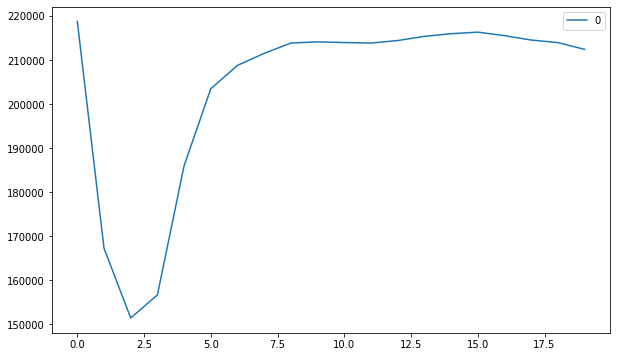

In [408]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

K = 2

In [409]:
knn_model = KNeighborsRegressor(n_neighbors=2)    #with numeric
knn_model.fit(X1_train_scaled, y1_train)

y1_pred = knn_model.predict(X1_test_scaled)

In [410]:
tKNN = validate(y1_train, y1train_pred, y1_test, y1_pred, 'KNN numeric')

In [411]:
pd.concat([t1KNN, tKNN], axis=1)

,KNN numeric train,KNN numeric test,KNN numeric train,KNN numeric test
R2,0.880,0.802,0.880,0.806
mae,17356.711,23687.286,17356.711,24405.219
mse,700695913.717,1202534012.246,700695913.717,1174814894.699
rmse,26470.661,34677.572,26470.661,34275.573


We will not get this into our solution repository.

KNN with Encoder?

## Adaboost Regression

In [86]:
from sklearn.preprocessing import OrdinalEncoder

In [87]:
X = df_.drop(target, axis=1)
y = df_[target]

In [88]:
cat = X.select_dtypes("object").columns
cat

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [432]:
# cat = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
      #  'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
      #  'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
      #  'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
      #  'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
      #  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
      #  'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
      #  'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
      #  'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
      #  'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
      #  'SaleCondition']

In [89]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotBathrooms,Age,TotalArea
0,9.0,3.0,65.0,8450,1.0,1.0,3.0,3.0,0.0,4.0,...,4.0,1.0,0,4.0,2.0,8.0,4.0,3.5,5,2566
1,3.0,3.0,80.0,9600,1.0,1.0,3.0,3.0,0.0,2.0,...,4.0,1.0,0,7.0,1.0,8.0,4.0,2.5,31,2524
2,9.0,3.0,68.0,11250,1.0,1.0,0.0,3.0,0.0,4.0,...,4.0,1.0,0,11.0,2.0,8.0,4.0,3.5,6,2706
3,8.0,3.0,60.0,9550,1.0,1.0,0.0,3.0,0.0,0.0,...,4.0,1.0,0,4.0,0.0,8.0,0.0,2.0,36,2473
4,9.0,3.0,84.0,14260,1.0,1.0,0.0,3.0,0.0,2.0,...,4.0,1.0,0,3.0,2.0,8.0,4.0,3.5,8,3343


In [434]:
df.MSSubClass.unique()

array(['2STORY_1946+', '1STORY_1946+', '2STORY_1945-', '1+STORY_FIN',
       '2FAMILY_CONV', '1+STORY_UNF', 'DUPL_ALL', '1STORY_PUD_1946+',
       '1STORY_1945-', 'SPL_FOYER', 'SPL_OR_MULTI', '2STORY_PUD_1946+',
       '2+STORY', 'PUD_MULTI', '1STORY_FIN_ATTIC'], dtype=object)

In [435]:
from sklearn.ensemble import AdaBoostRegressor

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)

In [437]:
#max_depth=1 yetersiz oldugu icin def deger 3 verilmis.
#base_estimator=DecisionTreeRegressor(max_depth=3)
ada_model = AdaBoostRegressor(random_state=101, n_estimators=50)

In [438]:
ada_model.fit(X_train, y_train)

AdaBoostRegressor(random_state=101)

In [439]:
y_pred = ada_model.predict(X_test)
ytrain_pred = ada_model.predict(X_train)

In [455]:
tAda = validate(y_train, ytrain_pred, y_test, y_pred, "Adaboost")
tAda

,Adaboost train,Adaboost test
R2,0.887,0.810
mae,20217.383,24275.571
mse,658966935.543,1149463911.300
rmse,25670.351,33903.745


### Cross-validate Adaboost

In [457]:
from sklearn.model_selection import cross_validate, cross_val_score
model = AdaBoostRegressor(random_state=101, n_estimators=50)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                             8.255682e-01
test_neg_mean_absolute_error       -2.248165e+04
test_neg_mean_squared_error        -9.894983e+08
test_neg_root_mean_squared_error   -3.119239e+04
dtype: float64

In [442]:
from sklearn.tree import plot_tree

In [446]:
model = AdaBoostRegressor(random_state=101, n_estimators=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

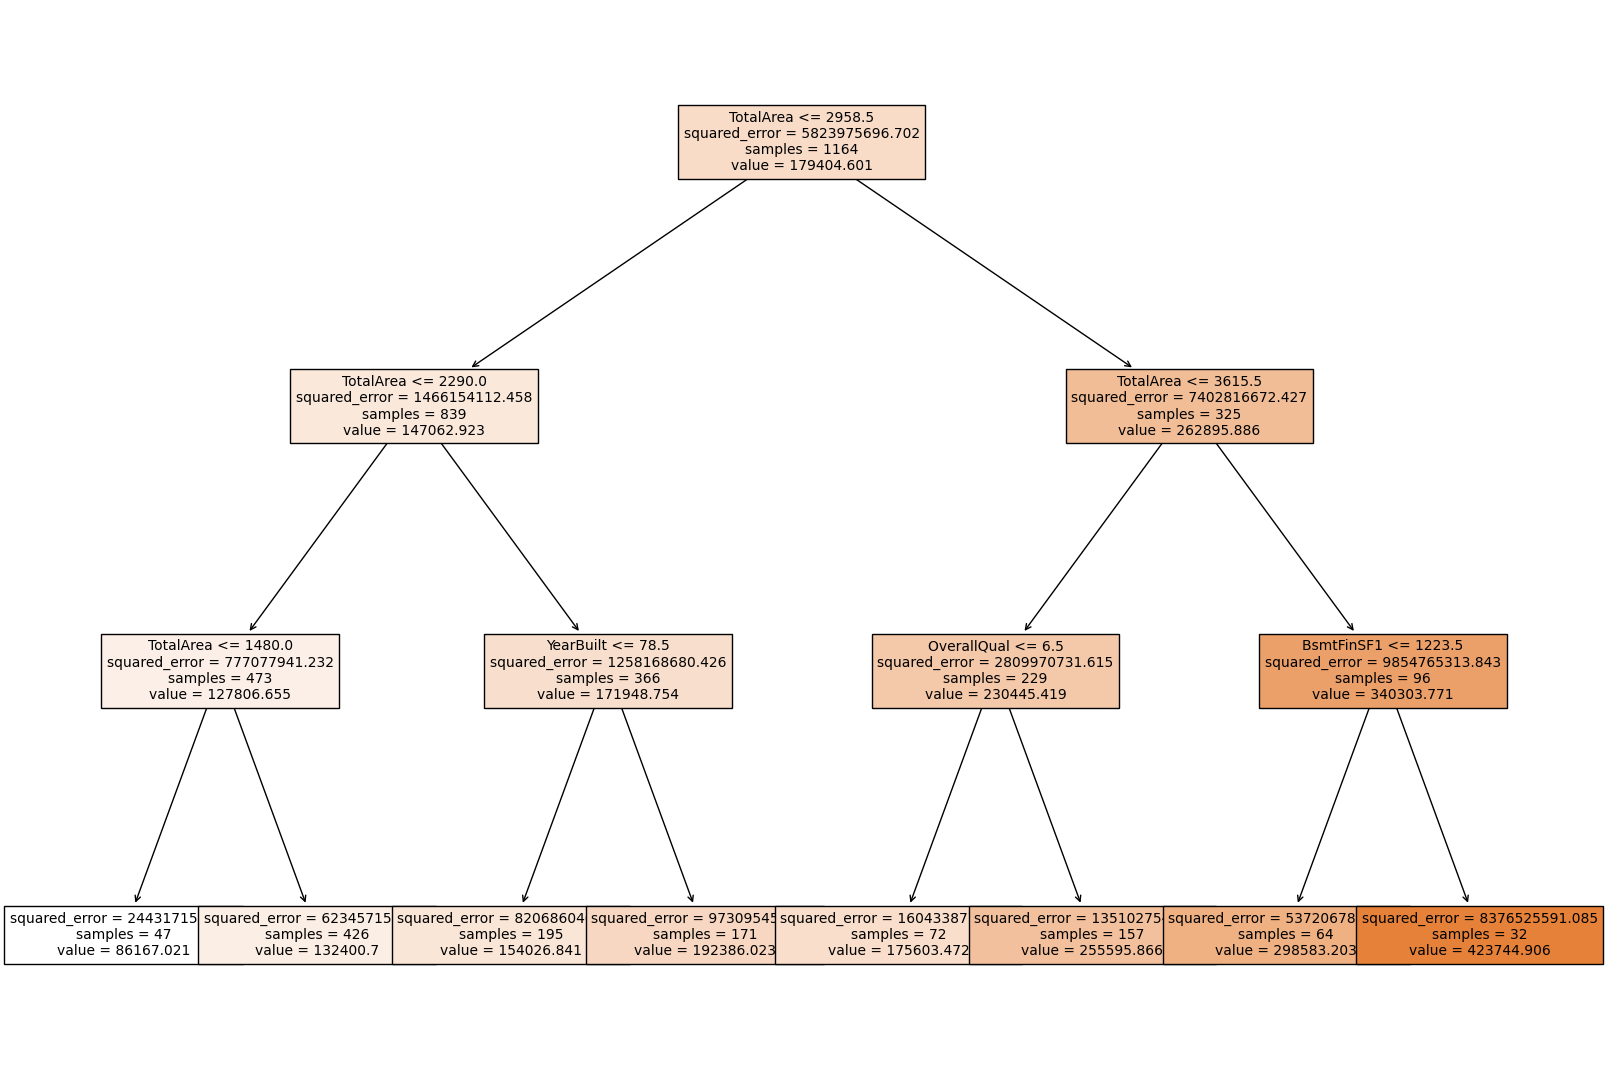

In [449]:
# features = list(X.columns)
plt.figure(figsize=(20,14),dpi=100)
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, fontsize=10);

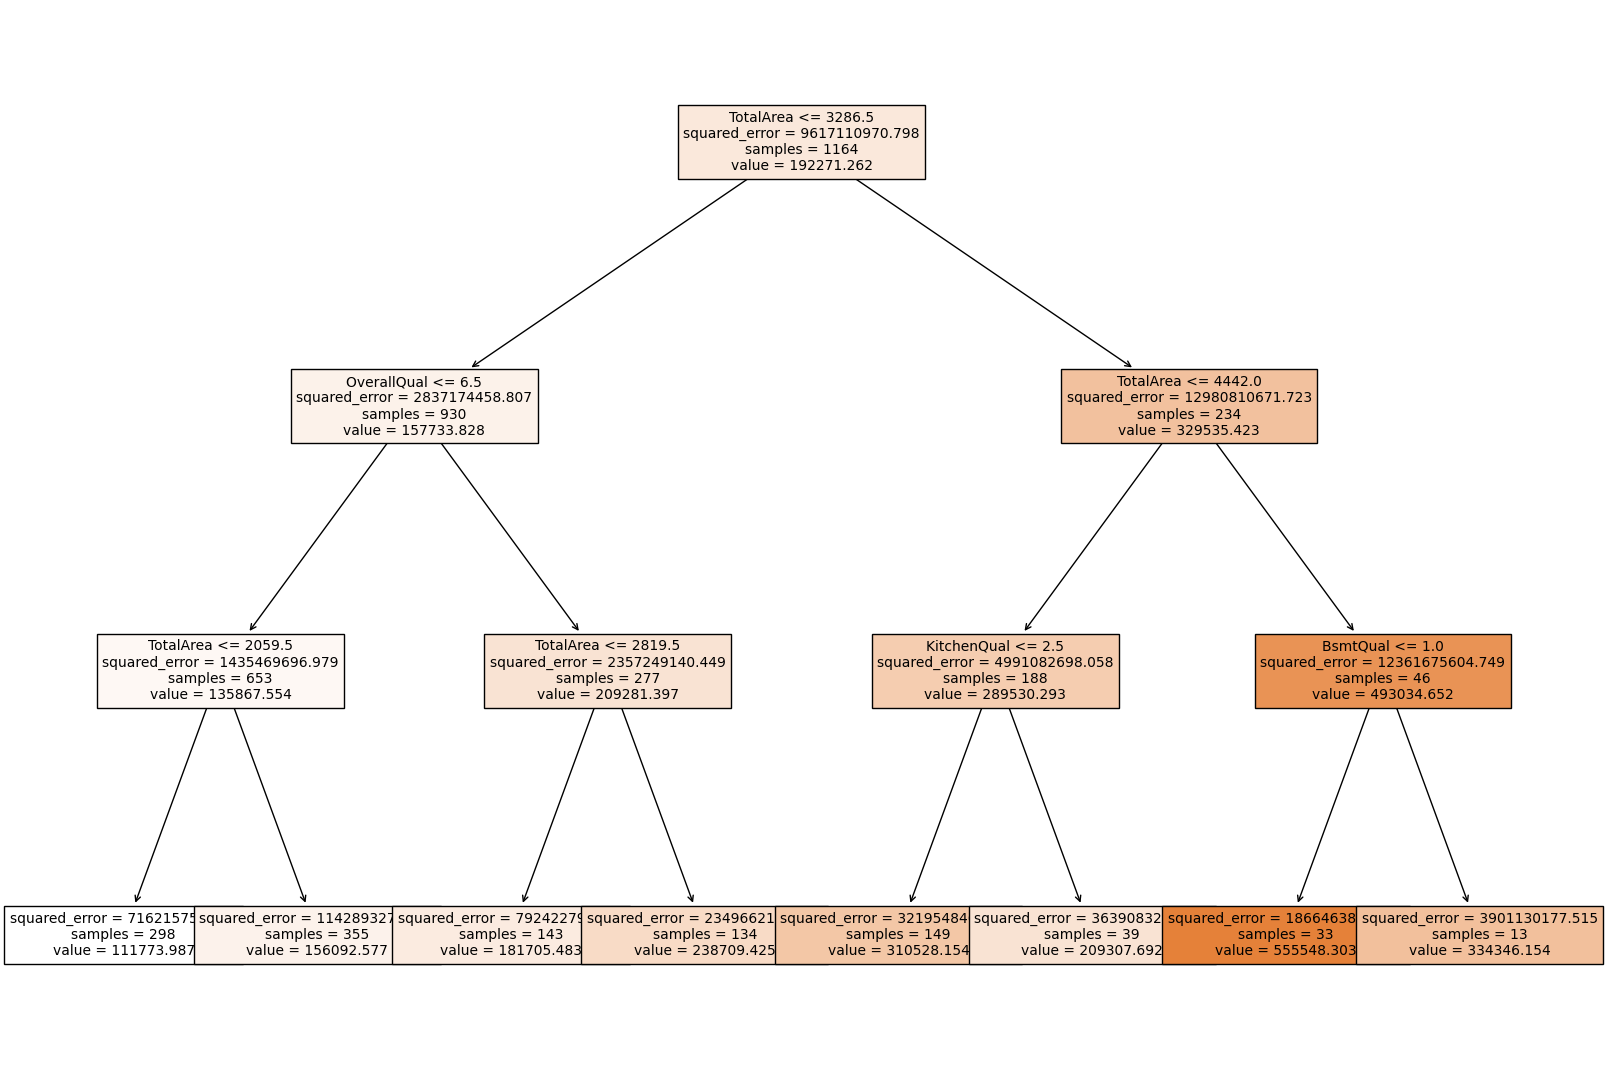

In [451]:
plt.figure(figsize=(20,14),dpi=100)
plot_tree(model.estimators_[1], filled=True, feature_names=X.columns, fontsize=10);

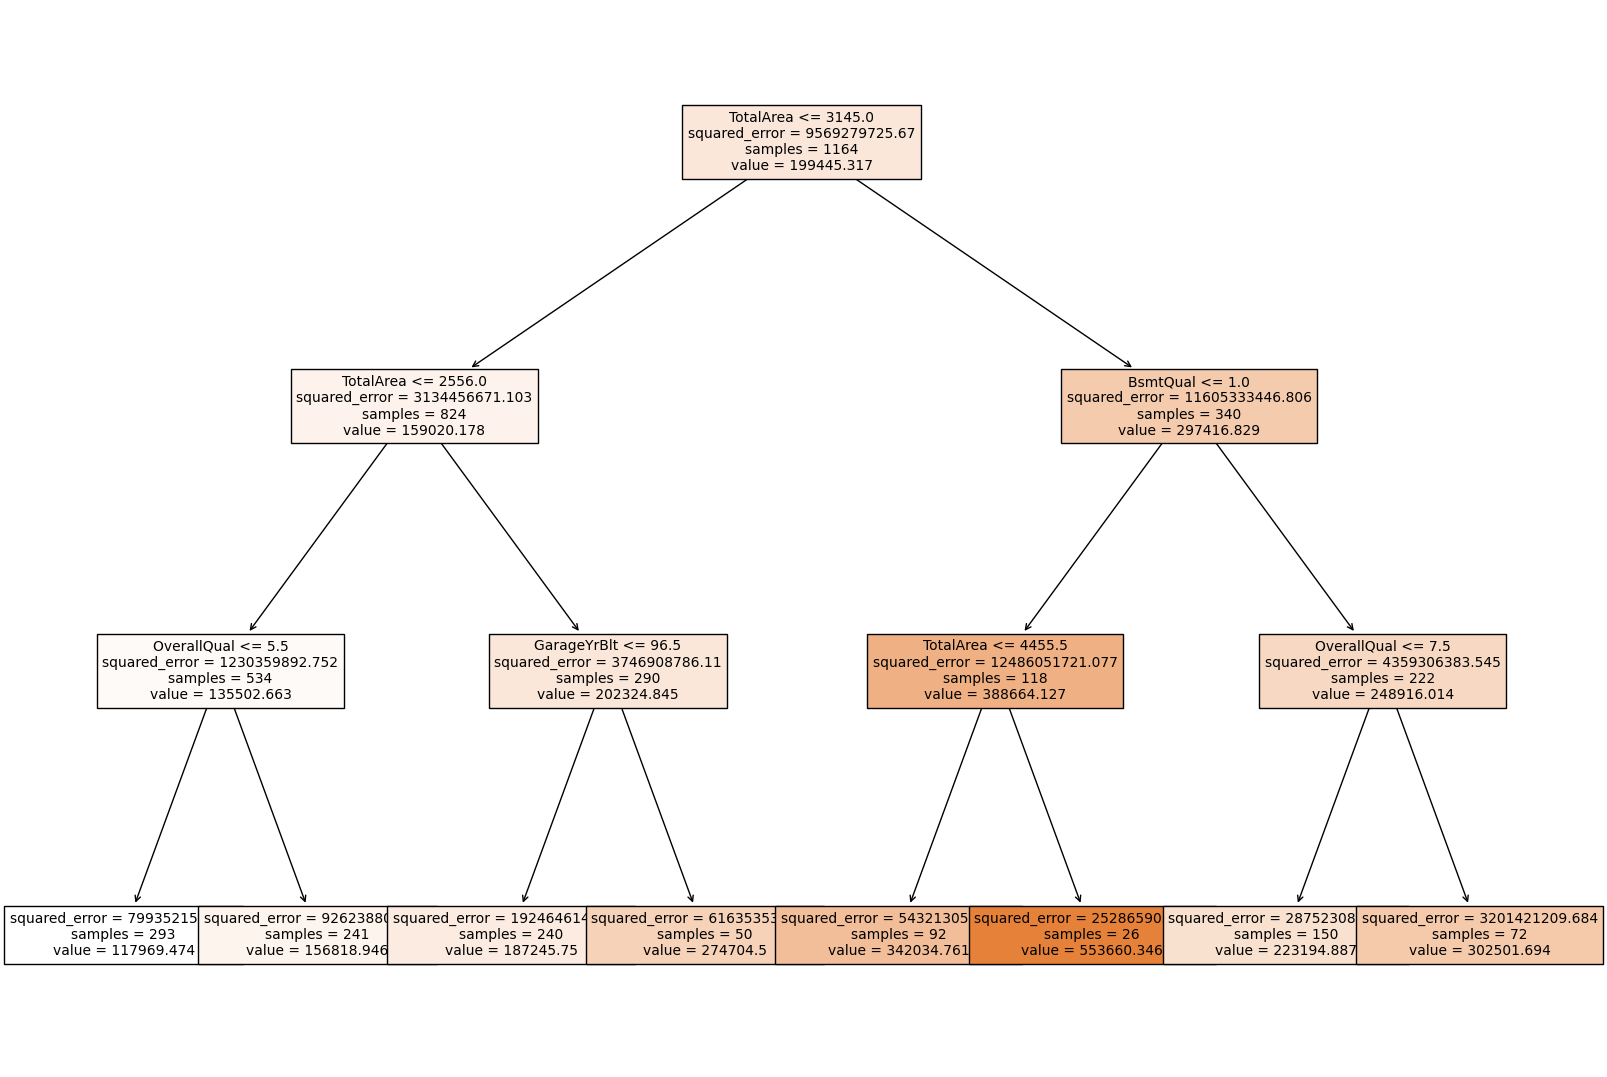

In [452]:
plt.figure(figsize=(20,14),dpi=100)
plot_tree(model.estimators_[2], filled=True, feature_names=X.columns, fontsize=10);

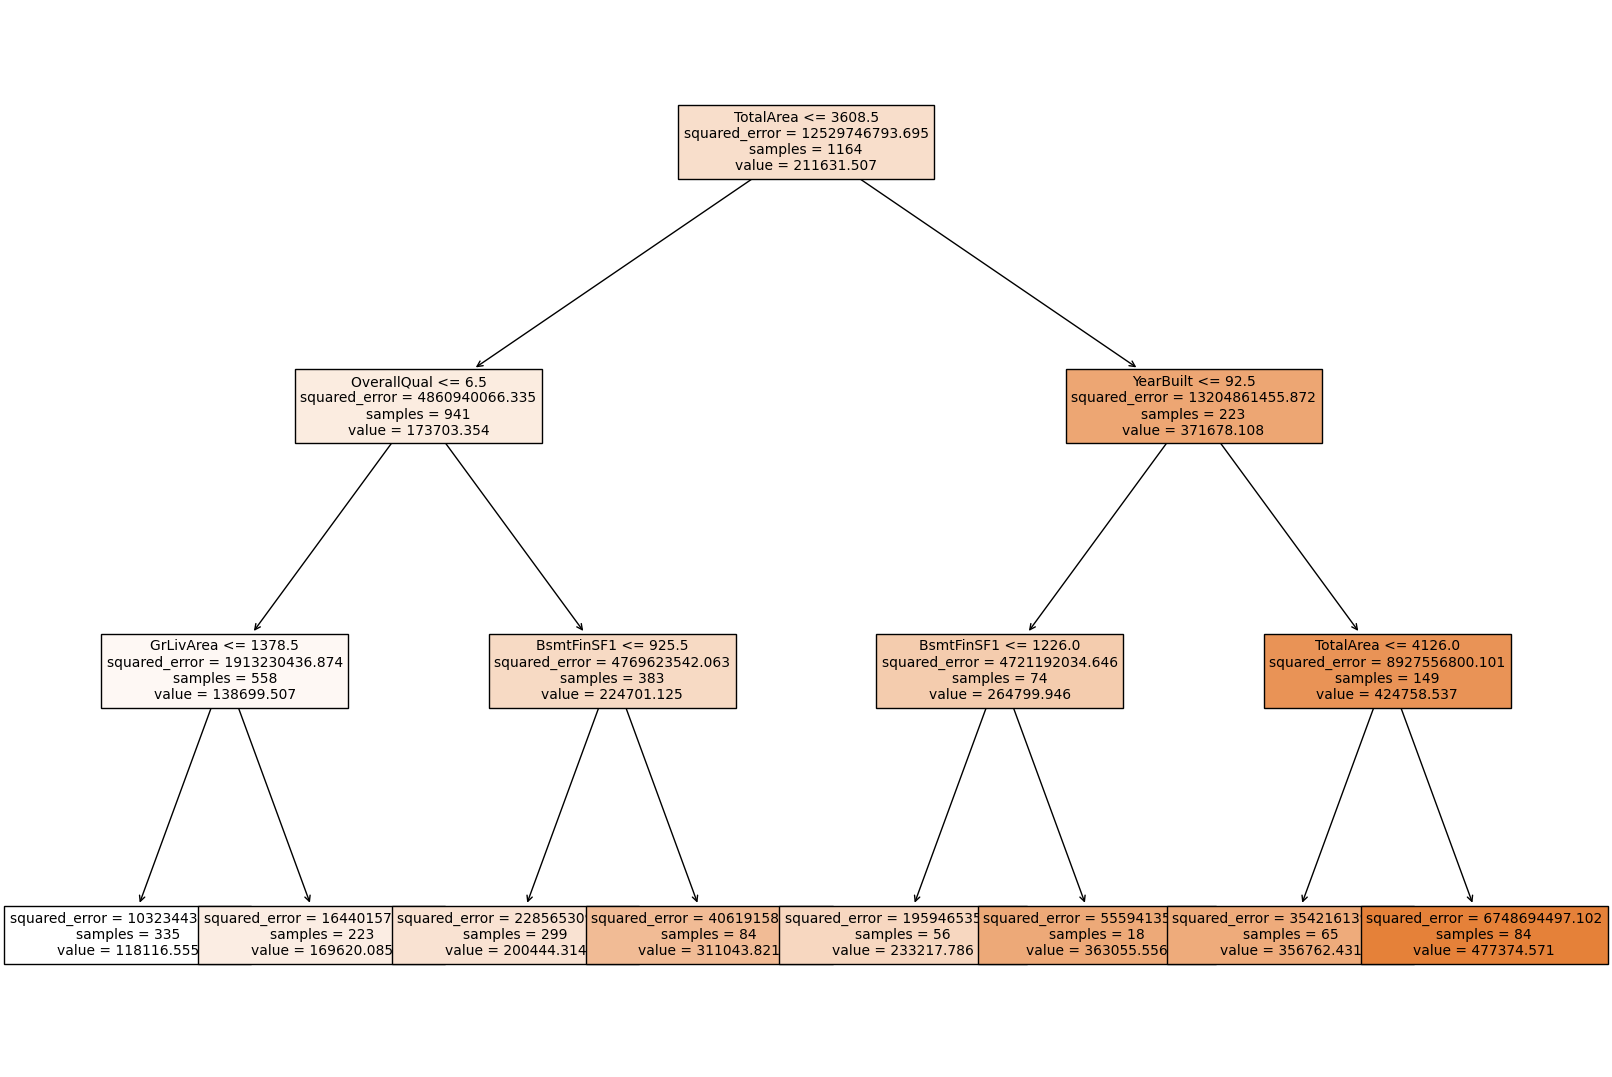

In [453]:
plt.figure(figsize=(20,14),dpi=100)
plot_tree(model.estimators_[3], filled=True, feature_names=X.columns, fontsize=10);

### Grid Search Adaboost

In [90]:
from sklearn.model_selection import GridSearchCV

In [467]:
param_grid = {"n_estimators":[50, 100, 200, 300, 500],
              "learning_rate":[0.1, 0.5, 0.8, 1],
              "loss": ["linear", "square"]
            }

In [468]:
model = AdaBoostRegressor(random_state=101)
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [469]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=101), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.8, 1],
                         'loss': ['linear', 'square'],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='neg_root_mean_squared_error')

In [470]:
grid_model.best_params_

{'learning_rate': 0.8, 'loss': 'linear', 'n_estimators': 50}

In [471]:
grid_model.best_score_

-30605.566889724083

In [475]:
y_pred = grid_model.predict(X_test)
ytrain_pred = grid_model.predict(X_train)

In [479]:
tAdaGrid = validate(y_train, ytrain_pred, y_test, y_pred, "Adaboost Best Params")
tAdaGrid

,Adaboost Best Params train,Adaboost Best Params test
R2,0.885,0.806
mae,20308.641,24426.632
mse,670845185.874,1175955196.152
rmse,25900.679,34292.203


In [480]:
pd.concat([tAda, tAdaGrid], axis=1)

,Adaboost train,Adaboost test,Adaboost Best Params train,Adaboost Best Params test
R2,0.887,0.810,0.885,0.806
mae,20217.383,24275.571,20308.641,24426.632
mse,658966935.543,1149463911.300,670845185.874,1175955196.152
rmse,25670.351,33903.745,25900.679,34292.203


### Feature Selection

In [481]:
grid_model.best_params_

{'learning_rate': 0.8, 'loss': 'linear', 'n_estimators': 50}

In [531]:
model = AdaBoostRegressor(random_state=101,n_estimators=50, learning_rate=0.8, loss='linear')
model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.8, random_state=101)

In [532]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['ada_Importance'])
ada_imp_feats = imp_feats.sort_values('ada_Importance', ascending=False)
ada_imp_feats

,ada_Importance
TotalArea,0.533670
BsmtQual,0.076244
TotBathrooms,0.070532
YearBuilt,0.060709
BsmtFinSF1,0.052895
...,...
MasVnrType,0.000000
GarageType,0.000000
Exterior2nd,0.000000
RoofMatl,0.000000


In [533]:
threshold = 0.001
ada_features = ada_imp_feats[ada_imp_feats.ada_Importance > threshold]
ada_features

,ada_Importance
TotalArea,0.533670
BsmtQual,0.076244
TotBathrooms,0.070532
YearBuilt,0.060709
BsmtFinSF1,0.052895
OverallQual,0.042586
MasVnrArea,0.015783
Age,0.015042
LotArea,0.013582
WoodDeckSF,0.013189


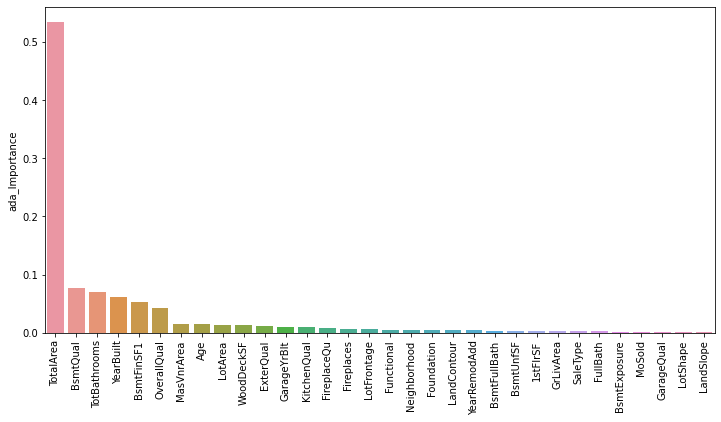

In [534]:
plt.figure(figsize=(12,6))
sns.barplot(data=ada_features, x=ada_features.index, y='ada_Importance')

plt.xticks(rotation=90);

where is MSSubClass ?? :(

## Gradient Boosting

In [497]:
from sklearn.ensemble import GradientBoostingRegressor

In [498]:
grad_model = GradientBoostingRegressor(random_state=101)

In [499]:
grad_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=101)

In [500]:
y_pred = grad_model.predict(X_test)
ytrain_pred = grad_model.predict(X_train)

In [501]:
tGrad = validate(y_train, ytrain_pred, y_test, y_pred, "GradientBoost")
tGrad

,GradientBoost train,GradientBoost test
R2,0.969,0.908
mae,9727.345,15542.722
mse,178992092.362,559309962.530
rmse,13378.793,23649.735


In [503]:
pd.concat([tAda, tGrad], axis=1)

,Adaboost train,Adaboost test,GradientBoost train,GradientBoost test
R2,0.887,0.810,0.969,0.908
mae,20217.383,24275.571,9727.345,15542.722
mse,658966935.543,1149463911.300,178992092.362,559309962.530
rmse,25670.351,33903.745,13378.793,23649.735


### Cross-validate Gradient Boosting

In [504]:
model = GradientBoostingRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                             8.969722e-01
test_neg_mean_absolute_error       -1.555788e+04
test_neg_mean_squared_error        -5.917019e+08
test_neg_root_mean_squared_error   -2.400387e+04
dtype: float64

### Grid Search for GradientBoosting

In [505]:
param_grid = {"n_estimators":[50, 100, 200, 300], "subsample":[0.8, 1], "max_features" : [None, 2, 3, 4],
            "learning_rate": [0.001, 0.01, 0.1, 0.5], 'max_depth':[2,3]}

In [506]:
model = GradientBoostingRegressor(random_state=101)
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [507]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5],
                         'max_depth': [2, 3], 'max_features': [None, 2, 3, 4],
                         'n_estimators': [50, 100, 200, 300],
                         'subsample': [0.8, 1]},
             scoring='neg_root_mean_squared_error')

In [508]:
grid_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 300,
 'subsample': 0.8}

In [509]:
grid_model.best_score_

-23342.997391146266

In [513]:
y_pred = grid_model.predict(X_test)
ytrain_pred = grid_model.predict(X_train)

In [514]:
tGradgrid = validate(y_train, ytrain_pred, y_test, y_pred, "GradBoost Grid")
tGradgrid

,GradBoost Grid train,GradBoost Grid test
R2,0.991,0.925
mae,5745.714,14327.092
mse,54817061.061,455845199.264
rmse,7403.854,21350.532


In [541]:
tAll = pd.concat([tAll, tGradgrid], axis=1)
tAll

,linear(numeric) train,linear(numeric) test,linear(numeric-scaled) train,linear(numeric-scaled) test,lasso train,lasso test,lasso_gridCV train,lasso_gridCV test,KNN numeric train,KNN numeric test,GradBoost Grid train,GradBoost Grid test
R2,0.831,0.812,0.831,0.812,0.831,0.812,0.831,0.812,0.880,0.802,0.991,0.925
mae,22111.380,23995.758,22111.364,23995.798,22110.103,23995.501,22088.967,23984.560,17356.711,23687.286,5745.714,14327.092
mse,986300242.026,1137323624.908,986300301.053,1137324533.879,986303215.581,1137185347.319,986492565.682,1136450652.004,700695913.717,1202534012.246,54817061.061,455845199.264
rmse,31405.417,33724.229,31405.418,33724.243,31405.465,33722.179,31408.479,33711.284,26470.661,34677.572,7403.854,21350.532


In [515]:
grid_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 300,
 'subsample': 0.8}

In [512]:
model = GradientBoostingRegressor(random_state=101, learning_rate=0.1, max_depth=3, max_features=None, n_estimators=300, subsample=0.8)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).mean()[2:]

test_r2                             9.029518e-01
test_neg_mean_absolute_error       -1.487448e+04
test_neg_mean_squared_error        -5.619878e+08
test_neg_root_mean_squared_error   -2.334300e+04
dtype: float64

### Feature Selection

In [516]:
grid_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 300,
 'subsample': 0.8}

In [535]:
model = GradientBoostingRegressor(random_state=101, learning_rate=0.1, max_depth=3, max_features=None, n_estimators=300, subsample=0.8)
model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=300, random_state=101, subsample=0.8)

In [537]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Grad_Importance'])
grad_imp_feats = imp_feats.sort_values('Grad_Importance', ascending=False)
grad_imp_feats

,Grad_Importance
TotalArea,0.580956
OverallQual,0.089153
BsmtQual,0.041235
TotBathrooms,0.035643
YearBuilt,0.032201
...,...
PavedDrive,0.000007
RoofMatl,0.000000
PoolQC,0.000000
MiscVal,0.000000


In [538]:
threshold = 0.001
grad_features = grad_imp_feats[grad_imp_feats.Grad_Importance > threshold]
grad_features

,Grad_Importance
TotalArea,0.580956
OverallQual,0.089153
BsmtQual,0.041235
TotBathrooms,0.035643
YearBuilt,0.032201
GarageCars,0.028632
BsmtFinSF1,0.021868
LotArea,0.017314
Age,0.017231
KitchenQual,0.010075


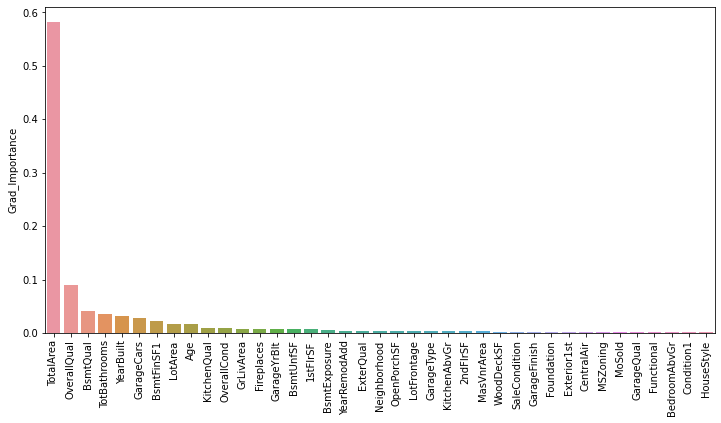

In [539]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_features, x=grad_features.index, y='Grad_Importance')

plt.xticks(rotation=90);

## XG Boost Regressor

In [ ]:
#!pip install --upgrade pip

In [ ]:
#!pip install xgboost

In [91]:
from xgboost import XGBRegressor

In [544]:
xgb_model = XGBRegressor(random_state=101, objective="reg:squarederror")

In [545]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [546]:
y_pred = xgb_model.predict(X_test)
ytrain_pred = xgb_model.predict(X_train)

In [547]:
tXGB = validate(y_train, ytrain_pred, y_test, y_pred, "XGBBoost")
tXGB

,XGBBoost train,XGBBoost test
R2,1.000,0.875
mae,770.588,17060.066
mse,1331361.441,758712017.654
rmse,1153.846,27544.728


In [548]:
pd.concat([tAda, tGrad, tXGB], axis=1)

,Adaboost train,Adaboost test,GradientBoost train,GradientBoost test,XGBBoost train,XGBBoost test
R2,0.887,0.810,0.969,0.908,1.000,0.875
mae,20217.383,24275.571,9727.345,15542.722,770.588,17060.066
mse,658966935.543,1149463911.300,178992092.362,559309962.530,1331361.441,758712017.654
rmse,25670.351,33903.745,13378.793,23649.735,1153.846,27544.728


### Cros-validate XGBoost

In [549]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             8.779628e-01
test_neg_mean_absolute_error       -1.707659e+04
test_neg_mean_squared_error        -7.245847e+08
test_neg_root_mean_squared_error   -2.624880e+04
dtype: float64

### Grid-search XGBoost

In [550]:
param_grid = {"n_estimators":[50, 100, 300,500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [551]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [552]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=101, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
 

In [553]:
grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 0.5}

In [554]:
grid_model.best_score_

-22156.845385330944

In [555]:
y_pred = grid_model.predict(X_test)
ytrain_pred = grid_model.predict(X_train)

In [556]:
tXGBgrid = validate(y_train, ytrain_pred, y_test, y_pred, "XGBoost Grid")
tXGBgrid

,XGBoost Grid train,XGBoost Grid test
R2,0.983,0.928
mae,7476.085,14008.198
mse,99638919.640,435636429.440
rmse,9981.930,20871.905


In [558]:
tBoosting = pd.concat([tXGBgrid, tGradgrid, tAda, tAdaGrid], axis=1)
tBoosting

,XGBoost Grid train,XGBoost Grid test,GradBoost Grid train,GradBoost Grid test,Adaboost train,Adaboost test,Adaboost Best Params train,Adaboost Best Params test
R2,0.983,0.928,0.991,0.925,0.887,0.810,0.885,0.806
mae,7476.085,14008.198,5745.714,14327.092,20217.383,24275.571,20308.641,24426.632
mse,99638919.640,435636429.440,54817061.061,455845199.264,658966935.543,1149463911.300,670845185.874,1175955196.152
rmse,9981.930,20871.905,7403.854,21350.532,25670.351,33903.745,25900.679,34292.203


### Feature Selection

In [560]:
grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 0.5}

In [571]:
model = XGBRegressor(random_state=101, objective="reg:squarederror", colsample_bytree=0.5, learning_rate=0.05, max_dept=3, n_estimators=500, subsample=0.5)
model.fit(X_train, y_train)

[18:05:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_dept" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_dept=3, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [572]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['XGB_Importance'])
xgb_imp_feats = imp_feats.sort_values('XGB_Importance', ascending=False)

In [576]:
threshold = 0.001
xgb_features = xgb_imp_feats[xgb_imp_feats.XGB_Importance > threshold]
xgb_features

,XGB_Importance
TotalArea,0.159610
GarageCars,0.140768
OverallQual,0.100968
BsmtQual,0.089184
KitchenQual,0.054286
...,...
MiscFeature,0.001249
ExterCond,0.001235
LotConfig,0.001127
Electrical,0.001027


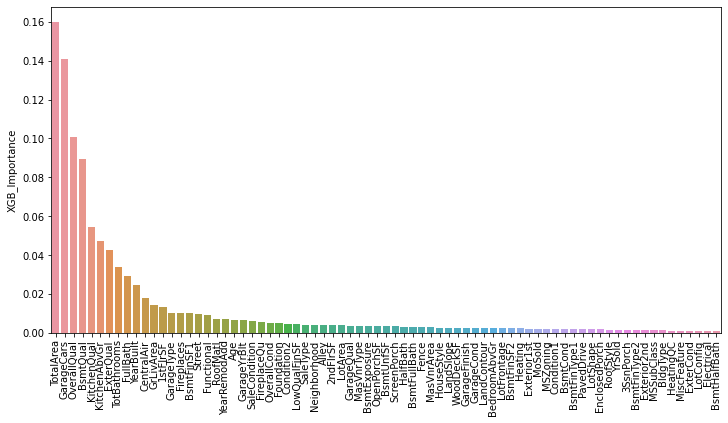

In [577]:
plt.figure(figsize=(12,6))
sns.barplot(data=xgb_features, x=xgb_features.index, y='XGB_Importance')

plt.xticks(rotation=90);

## Compare Feature Importances

In [582]:
tImp = pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)
tImp

,ada_Importance,Grad_Importance,XGB_Importance
TotalArea,0.533670,0.580956,0.159610
BsmtQual,0.076244,0.041235,0.089184
TotBathrooms,0.070532,0.035643,0.033953
YearBuilt,0.060709,0.032201,0.024737
BsmtFinSF1,0.052895,0.021868,0.010177
...,...,...,...
MasVnrType,0.000000,0.000967,0.003840
GarageType,0.000000,0.003933,0.010541
Exterior2nd,0.000000,0.000262,0.001590
RoofMatl,0.000000,0.000000,0.007413


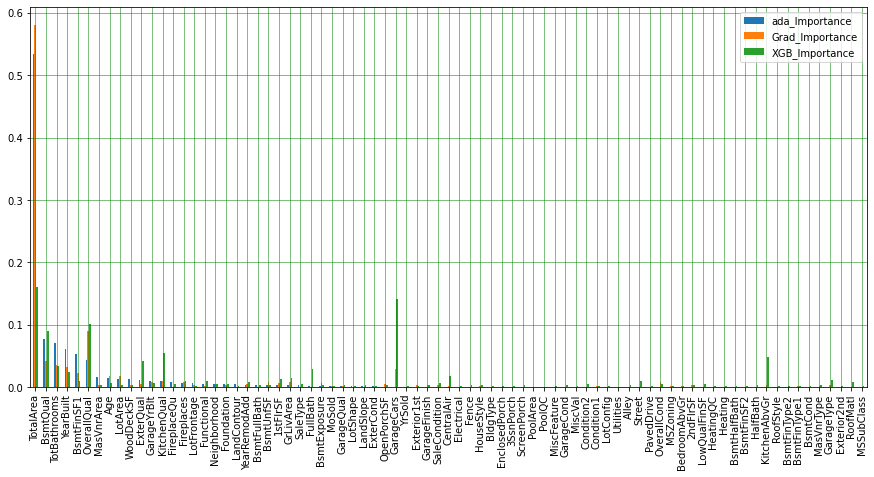

In [588]:
tImp.plot(kind="bar", figsize=(15, 7))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

# Final Model

In [589]:
threshold = 0.02
xgb_sel_features = xgb_imp_feats[xgb_imp_feats.XGB_Importance > threshold]
xgb_sel_features

,XGB_Importance
TotalArea,0.159610
GarageCars,0.140768
OverallQual,0.100968
BsmtQual,0.089184
KitchenQual,0.054286
KitchenAbvGr,0.047541
ExterQual,0.042467
TotBathrooms,0.033953
FullBath,0.029425
YearBuilt,0.024737


In [594]:
X_new = X[xgb_sel_features.index]
X_new.head()

,TotalArea,GarageCars,OverallQual,BsmtQual,KitchenQual,KitchenAbvGr,ExterQual,TotBathrooms,FullBath,YearBuilt
0,2566,2,7.0,2.0,2.0,1,2.0,3.5,2,104.0
1,2524,2,6.0,2.0,3.0,1,3.0,2.5,2,77.0
2,2706,2,7.0,2.0,2.0,1,2.0,3.5,2,102.0
3,2473,3,7.0,4.0,2.0,1,3.0,2.0,1,19.0
4,3343,3,8.0,2.0,2.0,1,2.0,3.5,2,101.0


In [595]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=101)

In [596]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")

In [597]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [599]:
y_pred = model.predict(X_test)
ytrain_pred = model.predict(X_train)

In [600]:
tXGBsel = validate(y_train, ytrain_pred, y_test, y_pred, "XGBBoost FS")
tXGBsel

,XGBBoost FS train,XGBBoost FS test
R2,0.995,0.846
mae,3881.970,19696.983
mse,28345173.361,930602611.779
rmse,5324.019,30505.780


In [601]:
pd.concat([tAda, tGrad, tXGB, tXGBsel], axis=1)

,Adaboost train,Adaboost test,GradientBoost train,GradientBoost test,XGBBoost train,XGBBoost test,XGBBoost FS train,XGBBoost FS test
R2,0.887,0.810,0.969,0.908,1.000,0.875,0.995,0.846
mae,20217.383,24275.571,9727.345,15542.722,770.588,17060.066,3881.970,19696.983
mse,658966935.543,1149463911.300,178992092.362,559309962.530,1331361.441,758712017.654,28345173.361,930602611.779
rmse,25670.351,33903.745,13378.793,23649.735,1153.846,27544.728,5324.019,30505.780


### Drop feature that causes overfitting

In [866]:
X_new2 = X.drop(['TotalArea'], axis=1)

In [867]:
X_train, X_test, y_train, y_test = train_test_split(X_new2, y, test_size=0.2, random_state=101)

In [613]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")

In [614]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [615]:
y_pred = model.predict(X_test)
ytrain_pred = model.predict(X_train)

In [616]:
tXGBsel2 = validate(y_train, ytrain_pred, y_test, y_pred, "XGBBoost FS 2")
tXGBsel2

,XGBBoost FS 2 train,XGBBoost FS 2 test
R2,1.000,0.879
mae,1059.465,18592.105
mse,2357938.566,734701962.517
rmse,1535.558,27105.386


In [617]:
pd.concat([tAda, tGrad, tXGB, tXGBsel, tXGBsel2], axis=1)

,Adaboost train,Adaboost test,GradientBoost train,GradientBoost test,XGBBoost train,XGBBoost test,XGBBoost FS train,XGBBoost FS test,XGBBoost FS 2 train,XGBBoost FS 2 test
R2,0.887,0.810,0.969,0.908,1.000,0.875,0.995,0.846,1.000,0.879
mae,20217.383,24275.571,9727.345,15542.722,770.588,17060.066,3881.970,19696.983,1059.465,18592.105
mse,658966935.543,1149463911.300,178992092.362,559309962.530,1331361.441,758712017.654,28345173.361,930602611.779,2357938.566,734701962.517
rmse,25670.351,33903.745,13378.793,23649.735,1153.846,27544.728,5324.019,30505.780,1535.558,27105.386


## Grid Search with New XGBoost Model

In [876]:
param_grid = {"n_estimators":[900, 950],'max_depth':[3,5], "learning_rate": [0.05, 0.06],
             "subsample":[0.25, 0.3], "colsample_bytree":[0.25, 0.3]}

In [877]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          n_jobs = -1)

In [878]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=101, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                  

In [879]:
grid_model.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 900,
 'subsample': 0.3}

In [880]:
grid_model.best_score_

-22945.77943847297

In [881]:
y_pred = grid_model.predict(X_test)
ytrain_pred = grid_model.predict(X_train)

In [882]:
tXGB_FSgrid = validate(y_train, ytrain_pred, y_test, y_pred, "XGBoost FS Grid")
tXGB_FSgrid

,XGBoost FS Grid train,XGBoost FS Grid test
R2,0.988,0.911
mae,6417.908,14977.700
mse,68074646.773,538141296.742
rmse,8250.736,23197.873


In [865]:
pd.concat([tBoosting, tXGB_FSgrid], axis=1)


,XGBoost Grid train,XGBoost Grid test,GradBoost Grid train,GradBoost Grid test,Adaboost train,Adaboost test,Adaboost Best Params train,Adaboost Best Params test,XGBoost FS Grid train,XGBoost FS Grid test
R2,0.983,0.928,0.991,0.925,0.887,0.810,0.885,0.806,0.994,0.923
mae,7476.085,14008.198,5745.714,14327.092,20217.383,24275.571,20308.641,24426.632,4684.083,14283.274
mse,99638919.640,435636429.440,54817061.061,455845199.264,658966935.543,1149463911.300,670845185.874,1175955196.152,35826567.792,469231532.245
rmse,9981.930,20871.905,7403.854,21350.532,25670.351,33903.745,25900.679,34292.203,5985.530,21661.753


End.

In [1]:
params = {'colsample_bytree': 0.3,
 'learning_rate': 0.05,
 'max_depth': 2,
 'n_estimators': 900,
 'subsample': 0.3}


In [93]:
xgb_model = XGBRegressor(random_state=101, objective="reg:squarederror", colsample_bytree=0.3, learning_rate=0.05, max_depth=2, n_estimators=900, subsample=0.3)


In [94]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
y_pred = xgb_model.predict(X_test)
ytrain_pred = xgb_model.predict(X_train)

In [98]:
tXGB = validate(y_train, ytrain_pred, y_test, y_pred, "XGBBoost")
tXGB

,XGBBoost train,XGBBoost test
R2,0.972,0.924
mae,9458.660,14244.677
mse,162091324.620,461821512.167
rmse,12731.509,21490.033
